In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Location
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd

import my_pickle as mp

import warnings
warnings.filterwarnings('ignore')

# READ IN DATA

In [134]:
user_df = mp.unjson_it('data_user').reset_index()
user_df = user_df.rename(index=str,columns={'index':'uid'})
user_df = mp.reinstate_date(user_df,['activeAt', 'available', 'birthday','created','updated'])
user_df['const'] = 1

convo_df = mp.unjson_it('data_convo')
message_df = mp.unjson_it('data_message') 
master_df = mp.unjson_it('data_master')

print("Make sure we're not using ECT data")
print(convo_df.timestamp.max())

Make sure we're not using ECT data
2017-10-01 06:37:20.466000


# SEPARATE INTO ACTIVE AND NOT ACTIVE

In [135]:
# Make lists of senders and receivers
uid_receivers = set(convo_df.uid_receiver)
uid_senders = set(convo_df.uid_sender)

# Combine the lists
uid_active = uid_senders.union(uid_receivers)

In [136]:
# Create a flag for active
user_df['active'] = user_df.uid.apply(lambda x: x in uid_active)
print("{:.3} of onboarded users are active".format(user_df.active.sum()/len(user_df)))

0.22 of onboarded users are active


NameError: name 'user_df' is not defined

# COMPARE 'ACTIVE' VS 'NOT ACTIVE' USERS

'active' = sent or received at least one message

In [137]:
# Separate into two dataframes
active_df = user_df[user_df['active']==True]
not_active_df = user_df[user_df['active']==False]

# GET CITY DATAFRAME WITH ACTIVE/NOT ACTIVE COUNTS

In [138]:
cities = not_active_df.groupby(['metro']).count().const.to_dict().keys()
not_active_count = not_active_df.groupby(['metro']).count().const.to_dict()
active_count = active_df.groupby(['metro']).count().const.to_dict()

In [139]:
city_df = pd.DataFrame(list(cities),[1]*len(cities))
city_df.columns = ['metro']

In [140]:
city_df['active_users'] = city_df.metro.apply(lambda x: active_count[x] if x in active_count.keys() else 0)
city_df['not_active_users'] = city_df.metro.apply(lambda x: not_active_count[x])
city_df['percent_active'] = city_df['active_users']/city_df['not_active_users']
city_df.head(2)

,metro,active_users,not_active_users,percent_active
1,Atlanta,22,795,0.027673
1,Boston,8,467,0.017131


In [17]:
# fig, ax = plt.subplots(figsize = (16,6))
# plt.bar(city_df.percent_active)

In [141]:
active_df.columns

Index(['uid', 'I_count', 'I_ratio', 'about', 'activeAt', 'age', 'amenities',
       'available', 'birthday', 'college', 'created', 'exclaim_count',
       'exclaim_ratio', 'facebookId', 'gender', 'has_about', 'has_facebookId',
       'has_linkedinId', 'has_picture', 'has_room', 'hobbies', 'hometownCity',
       'hometownCountry', 'hometownState', 'inRelationship', 'isClean',
       'isNight', 'isStudent', 'len_about', 'linkedinId', 'location',
       'maxCost', 'metro', 'minCost', 'neighborhoods', 'numRoommates',
       'onboarded', 'period_count', 'period_ratio', 'petsOk', 'picture',
       'question_count', 'question_ratio', 'sentence_count', 'sentence_ratio',
       'smokingOk', 'term', 'timeframe', 'type', 'updated', 'work', 'const',
       'active'],
      dtype='object')

## Gender

In [143]:
active_users = len(active_df)
active_males = active_df.gender.values.sum()
active_females = active_users-active_males

In [144]:
not_active_users = len(not_active_df)
not_active_males = not_active_df.gender.values.sum()
not_active_females = not_active_users-active_males

In [145]:
all_males = active_males+not_active_males
all_females = active_females+not_active_females

In [131]:
print(" MALE VS FEMALE ACTIVE USERS \n")
print("         Active  Not-Active     Percent-Active")
print(" Male\t {} \t {} \t\t{:.4}".format(active_males,not_active_males,active_males/all_males))
print(" Female\t {} \t {}\t\t{:.4}".format(active_females,not_active_females,active_females/all_females))

 MALE VS FEMALE ACTIVE USERS 

         Active  Not-Active     Percent-Active
 Male	 2434 	 10467 		0.1887
 Female	 3223 	 17647		0.1544


## Age

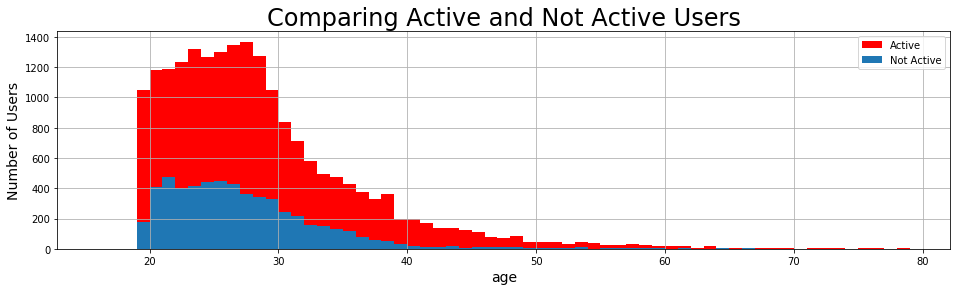

age active users: 26.875729185
age not active users: 28.616005179




In [146]:
plt.title('Comparing Active and Not Active Users',fontsize=24) 
plot_feature('age', bins=range(16,80))

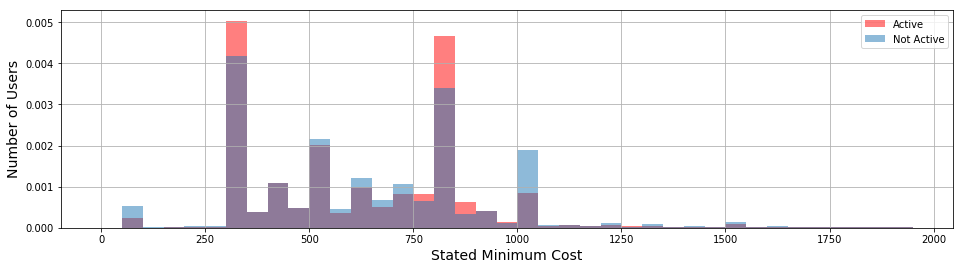

minCost active users: 636.288998358
minCost not active users: 636.757386424




Text(0.5,1,'Comparing Active and Not Active Users')

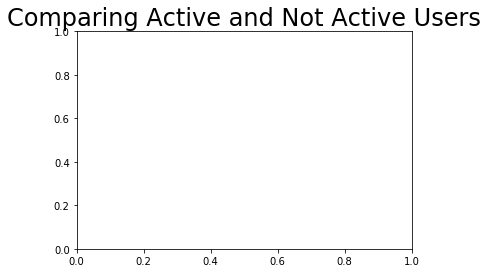

In [156]:
col = 'minCost'
bins=bins=range(0,2000, 50)
not_active = not_active_df[col].hist(figsize = (16,4), bins = bins, normed=True,alpha = .5, color='r')
active = active_df[col].hist(figsize = (16,4), bins = bins,normed=True, alpha = .5)

plt.xlabel("Stated Minimum Cost",fontsize=14)
plt.ylabel('Number of Users',fontsize=14)
plt.legend(['Active',"Not Active"])
plt.show()
print(col+" active users: {:.9f}".format(active_df[col].mean()))
print(col+" not active users: {:.9f}\n\n".format(not_active_df[col].mean()))

plt.title('Comparing Active and Not Active Users',fontsize=24) 


In [151]:
# fn to display plot
def plot_feature(col, bins=None):
    
    not_active = not_active_df[col].hist(figsize = (16,4), bins = bins, normed=True,alpha = .5, color='r')
    active = active_df[col].hist(figsize = (16,4), bins = bins,normed=True, alpha = .5)
    
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Number of Users',fontsize=14)
    plt.legend(['Active',"Not Active"])
    plt.show()
    print(col+" active users: {:.9f}".format(active_df[col].mean()))
    print(col+" not active users: {:.9f}\n\n".format(not_active_df[col].mean()))

In [15]:
# plt.title('Comparing Active and Not Active Users',fontsize=24) 
# plot_feature('sentence_count', bins=range(1,20,1))

## Has About

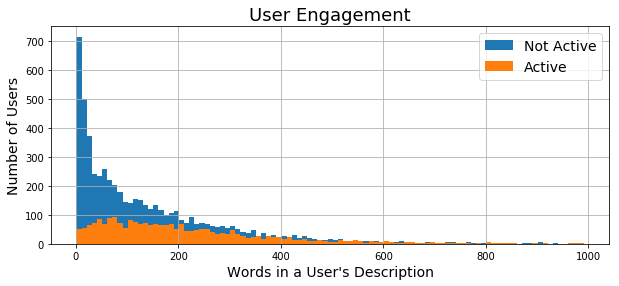

len_about active users: 108.423369277
len_about not active users: 45.760270903




In [132]:
plt.title('User Engagement',fontsize=18) 
col='len_about'
bins=range(1,1000,10)

not_active = not_active_df[col].hist(figsize = (10,4), bins = bins, alpha = 1)
active = active_df[col].hist(figsize = (10,4), bins = bins, alpha = 1)

plt.xlabel("Words in a User\'s Description",fontsize=14)
plt.ylabel('Number of Users',fontsize=14)
plt.legend(["Not Active",'Active'],fontsize=14)
plt.show()
print(col+" active users: {:.9f}".format(active_df[col].mean()))
print(col+" not active users: {:.9f}\n\n".format(not_active_df[col].mean()))

In [101]:
len(user_df)

25738

In [104]:
len(active_df)/len(user_df)

0.21979174761053694

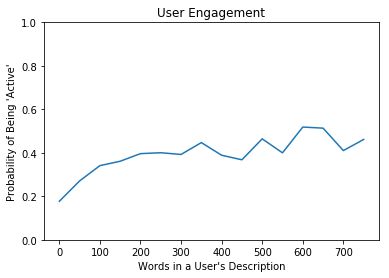

In [108]:
bin_size =50
max_x = 801
range_val= int(max_x/bin_size)
active_df['about_bin'] = active_df.len_about.apply(lambda x: int(x/bin_size ))
not_active_df['about_bin'] = not_active_df.len_about.apply(lambda x: int(x/bin_size ))
counts_active = active_df.groupby(['about_bin']).uid.count()
counts_not_active = not_active_df.groupby(['about_bin']).uid.count()
all_counts = pd.concat([counts_active,counts_not_active], axis=1)
all_counts.columns = ['active', 'not_active']
all_counts = all_counts.fillna(0)
all_counts['total'] = all_counts.active+all_counts.not_active
all_counts['percent_active'] = all_counts.active/all_counts.total
all_counts['percent_not_active'] = all_counts.not_active/all_counts.total
plt.plot(range(0,range_val*bin_size,bin_size),all_counts['percent_active'][0:range_val])
plt.ylim( (0, 1) )  # set the xlim to xmin, xmax
plt.title('User Engagement' )
plt.xlabel('Words in a User\'s Description')
plt.ylabel("Probability of Being \'Active\'")
plt.show()

In [63]:
len(all_counts['percent_active'][0:100])

100

In [77]:
from pandas.DataFrame.plot import kde

ModuleNotFoundError: No module named 'pandas.DataFrame'

In [ ]:
mp.json_it(user_df,'data_user_active')